In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_csv
import matplotlib.pyplot as plt
plt.rcdefaults()

In our project we wanted to explore the 2017 outbreak of Cholera in Yemen. With such a highly infectious disease, we wanted to see how the population density of the different governorates of Yemen correlated with the rates that the disease spread throughout the population.

To begin to explore this question a .csv file containing relevant data was loaded and organized into different tables. Using the postal code for each governorate region, the cases per time period were organized into a single series for each governorate.





In [2]:
filename = 'data/YemenCholera.csv'
table = read_csv(filename, header=0, index_col=0, decimal='M', encoding = "latin1")
table.columns = ['Gov','Cases', 'Deaths', 'CFR', 'AR', 'PCode']

In [3]:
Gov = table.Gov
Cases = table.Cases
Deaths = table.Deaths
CFR = table.CFR
AR = table.AR
PCode = table.PCode;

In [4]:
Amran = []
AlMahwit = []
AlDhalee = []
Abyan = []
Sanaa = []
Hajjah = []
Dhamar = []
AlHudaydah = []
AlBayda = []
Amanat = []
AlJawf = []
Raymah = []
Lahj = []
Aden = []
Ibb = []
Taizz = []
Marib = []
Saada = [0]
Shabwah = [0]
AmranAR = 0
AlMahwitAR = 0
AlDhaleeAR = 0
AbyanAR = 0
SanaaAR = 0
HajjahAR = 0
DhamarAR = 0
AlHudaydahAR = 0
AlBaydaAR = 0
AmanatAR = 0
AlJawfAR = 0
RaymahAR = 0
LahjAR = 0
AdenAR = 0
IbbAR = 0
TaizzAR = 0
MaribAR = 0
SaadaAR = 0
ShabwahAR = 0

0

In [5]:
for i in range(len(Gov.index)):
    if Gov[i] == "Moklla":
        continue
    if Gov[i] == "Say'on":
        continue
    if int(PCode[i]) == 29:
        Amran.append(Cases[i])
        AmranAR += float(AR[i])
    if int(PCode[i]) == 27:
        AlMahwit.append(Cases[i])
        AlMahwitAR += float(AR[i])
    if int(PCode[i]) == 30:
        AlDhalee.append(Cases[i])
        AlDhaleeAR += float(AR[i])
    if int(PCode[i]) == 12:
        Abyan.append(Cases[i])
        AbyanAR += float(AR[i])
    if int(PCode[i]) == 23:
        Sanaa.append(Cases[i])
        SanaaAR += float(AR[i])
    if int(PCode[i]) == 17:
        Hajjah.append(Cases[i])
        HajjahAR += float(AR[i])
    if int(PCode[i]) == 20:
        Dhamar.append(Cases[i])
        DhamarAR += float(AR[i])
    if int(PCode[i]) == 18:
        AlHudaydah.append(Cases[i])
        AlHudaydahAR += float(AR[i])
    if int(PCode[i]) == 14:
        AlBayda.append(Cases[i])
        AlBaydaAR += float(AR[i])
    if int(PCode[i]) == 13:
        Amanat.append(Cases[i])
        AmanatAR += float(AR[i])
    if int(PCode[i]) == 16:
        AlJawf.append(Cases[i])
        AlJawfAR += float(AR[i])
    if int(PCode[i]) == 31:
        Raymah.append(Cases[i])
        RaymahAR += float(AR[i])
    if int(PCode[i]) == 25:
        Lahj.append(Cases[i])
        LahjAR += float(AR[i])
    if int(PCode[i]) == 24:
        Aden.append(Cases[i])
        AdenAR += float(AR[i])
    if int(PCode[i]) == 11:
        Ibb.append(Cases[i])
        IbbAR += float(AR[i])
    if int(PCode[i]) == 15:
        Taizz.append(Cases[i])
        TaizzAR += float(AR[i])
    if int(PCode[i]) == 26:
        Marib.append(Cases[i])
        MaribAR += float(AR[i])
    if int(PCode[i]) == 22:
        Saada.append(Cases[i])
        SaadaAR += float(AR[i])
    if int(PCode[i]) == 21:
        Shabwah.append(Cases[i])
        ShabwahAR += float(AR[i])
Govern = [Amran, AlMahwit, AlDhalee, Abyan, Sanaa, Hajjah, Dhamar, AlHudaydah, AlBayda, Amanat, AlJawf, Raymah,
          Lahj, Aden, Ibb, Taizz, Marib, Saada, Shabwah]
Temp = [AmranAR, AlMahwitAR, AlDhaleeAR, AbyanAR, SanaaAR, HajjahAR, DhamarAR, AlHudaydahAR, AlBaydaAR, AmanatAR, AlJawfAR,
            RaymahAR, LahjAR, AdenAR, IbbAR, TaizzAR, MaribAR, SaadaAR, ShabwahAR]
GovAR = []

[]

Additionally, each series had to be reversed to be organized into chronological order. 


In [6]:
for i in Govern:
    i.reverse()
for i in Temp:
    i = i/127
    GovAR.append(i)

The cases per governorate area over the 6 month period were then graphed. Since data was not collected in equal time intervals, the 127 values were averaged to be taken approximately 1.5 days apart. 


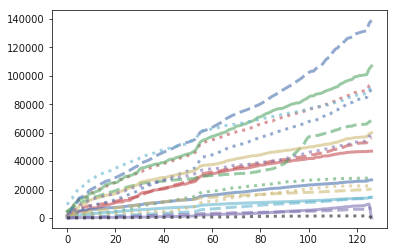

In [20]:
checkpoints = linrange(127)
for i in range(len(Govern)):
    decorate = ""
    color_array = ["r","r","r","g","g","g","b","b","b","c","c","c","y","y","y","m","m","m","k","k","k"]
    decorate += color_array[i%21]
    if (i+1) % 3 == 0:
        decorate += "-"
    if (i+1) % 3 == 1:
        decorate += ":"
    if (i+1) % 3 == 2:
        decorate += "--"
    plot(checkpoints,Govern[i], decorate)




Different sum totals of cases and rate of new cases were observed across the governorates. Some governorates had much higher infection rates than others, despite being similarly populated. Our hypothesis for explaining the varying infection/attack rates between the regions was that governorates with a higher population density would have higher attack rates due to people having closer contact with a larger number of people.

To test this, the attack rate of each governorate was found and was graphed against the corresponding population density of that governorate. The attack ratios were averaged throughout the 6 month period to reflect how prevalent of a threat it was during the entire time.


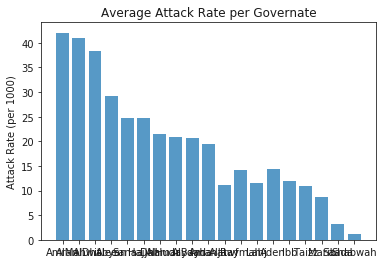

In [24]:
#Carlos's Mutant Baby
objects = ("Amran", "AlMahwit", "AlDhalee", "Abyan", "Sanaa", "Hajjah", "Dhamar", "AlHudaydah", "AlBayda", "Amanat", "AlJawf", 
           "Raymah", "Lahj", "Aden", "Ibb", "Taizz", "Marib", "Saada", "Shabwah")
y_pos = np.arange(len(objects))
performance = GovAR

plt.bar(y_pos, performance, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Attack Rate (per 1000)')
plt.title('Average Attack Rate per Governate')

plt.show()

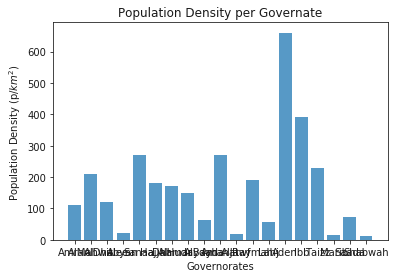

In [23]:
objects = ("Amran", "AlMahwit", "AlDhalee", "Abyan", "Sanaa", "Hajjah", "Dhamar", "AlHudaydah", "AlBayda", "Amanat", "AlJawf", 
           "Raymah", "Lahj", "Aden", "Ibb", "Taizz", "Marib", "Saada", "Shabwah")
y_pos = np.arange(len(objects))
pop_dens = [110,210,120,23,270,180,170,150,62,270,17,190,58,660,390,230,14,74,12]

plt.bar(y_pos, pop_dens, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Population Density (p/$km^2$) ')
plt.xlabel('Governorates')
plt.title('Population Density per Governate')
 
plt.show()

Text(0.5,1,'Average Attach Rate per Population Density')

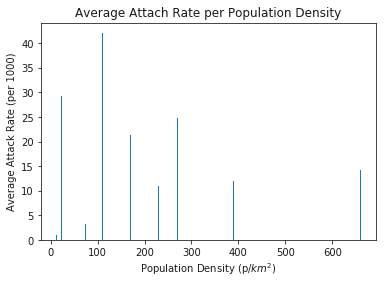

In [22]:
pop_den = [110,210,120,23,270,180,170,150,62,270,17,190,58,660,390,230,14,74,12]

avg_AR =[42.09,40.9,38.4,29.3,24.7,24.63,21.4,20.8,20.65,19.47,11.15,14.12,11.59,14.28,11.98,11,8.59,3.26,1.11]

plt.bar(pop_den,avg_AR,)
plt.xlabel('Population Density (p/$km^2$)')
plt.ylabel('Average Attack Rate (per 1000)')
plt.title('Average Attach Rate per Population Density')

Looking at the results, no clear relationship can be discerned between population density and the attack rate for cholera by governorates. Governorates with relatively low population densities had similar or even higher attack ratios than those with high population densities. Aden, with a remarkable density of 660 people per square kilometer had a lower average attack ratio than governorates with densities as low as 20.

 While it seems logical that a disease would most easily spread through an area where there are many people in close proximity of each other, there are multiple factors that can affect how quickly and effectively a disease can move through a population. Considering that cholera is mostly spread through contaminated water, governorates with better infrastructure and access to clean water might not be at as great of a risk for cholera than a rural area with poor access to clean water. Additionally, containment efforts by the Yemen government, Red Cross, and the World Health Organization in highly dense populated areas likely had greatly decreased the attack ratio for the disease. 
